In [180]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [181]:
neighborhoods = gpd.read_file("data/Neighborhood Association Boundaries (GIS).geojson")
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,(POLYGON ((-86.79511056795417 36.1757596496334...
1,Charlotte Park,(POLYGON ((-86.87459668651866 36.1575770268129...
2,Hillwood,(POLYGON ((-86.87613708067906 36.1355409894979...
3,West Meade,"(POLYGON ((-86.9038380396094 36.1255414807897,..."
4,White Bridge,(POLYGON ((-86.86321427797685 36.1288622289404...


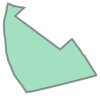

In [182]:
# calling a geometry variable
neighborhoods.loc[0, 'geometry']

In [183]:
bike_racks = pd.read_csv("data/BikeRacks.csv")
bike_racks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
the_geom      426 non-null object
OBJECTID      430 non-null int64
Type          430 non-null object
Domain        430 non-null object
Status        430 non-null object
IDNumber      430 non-null int64
Quantity      430 non-null int64
Location      430 non-null object
Capacity      430 non-null int64
LON           430 non-null float64
LAT           430 non-null float64
Detail_Loc    430 non-null object
Data_Colle    430 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 43.8+ KB


In [184]:
bike_racks.head()

,the_geom,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788506 36.04992777776401),1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260503 36.185280037810124),2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966663 36.158421598626106),3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.6865259267347 36.187546694847676),4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308803 36.172455406173995),5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept


In [185]:
bike_racks['the_geom'] = bike_racks.apply(lambda x: Point((float(x.LON), float(x.LAT))), axis=1)

In [186]:
bike_racks_geo = gpd.GeoDataFrame(bike_racks, crs = neighborhoods.crs, geometry = bike_racks["the_geom"])

In [187]:
nash_bike_racks = gpd.sjoin(bike_racks_geo, neighborhoods, op = 'within')

In [188]:
nash_bike_racks[['name','IDNumber']].groupby('name').agg('count').sort_values(by='IDNumber', ascending=False)

,IDNumber
name,
Urban Residents,51
Sylvan Park,10
Hillsboro-West End,9
Woodbine,6
Edgehill (ONE),6
Nations,6
Lockeland Springs,6
Historic Edgefield,5
Sunnyside,4


In [189]:
urban_bikes = nash_bike_racks.loc[nash_bike_racks.name == 'Urban Residents']
urban_bikes.head()

,the_geom,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,name
9,POINT (-86.7799546267 36.1633719897),10,Rack,Public,Future Artistic,83,0,Bus Stop,0,-86.779955,36.163372,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.7799546267 36.1633719897),41,Urban Residents
10,POINT (-86.77974046940001 36.163455453),11,Rack,Public,Existing,57,1,Bus Stop,2,-86.779740,36.163455,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.77974046940001 36.163455453),41,Urban Residents
11,POINT (-86.78151617340001 36.1623498407),12,Rack,Public,Existing,119,2,Library,4,-86.781516,36.162350,Downtown Nashville Public Library,Health Dept,POINT (-86.78151617340001 36.1623498407),41,Urban Residents
12,POINT (-86.7762348971 36.1632842775),13,Rack,Public,Proposed,258,0,Bus Stop,0,-86.776235,36.163284,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.7762348971 36.1632842775),41,Urban Residents
13,POINT (-86.7760875556 36.1631394547),14,Rack,Public,Future Artistic,259,0,Bus Stop,0,-86.776088,36.163139,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.7760875556 36.1631394547),41,Urban Residents


In [190]:
urban_polygon = neighborhoods.loc[neighborhoods.name == 'Urban Residents']
urban_polygon.head()

,name,geometry
41,Urban Residents,(POLYGON ((-86.78122053774267 36.1645653773768...


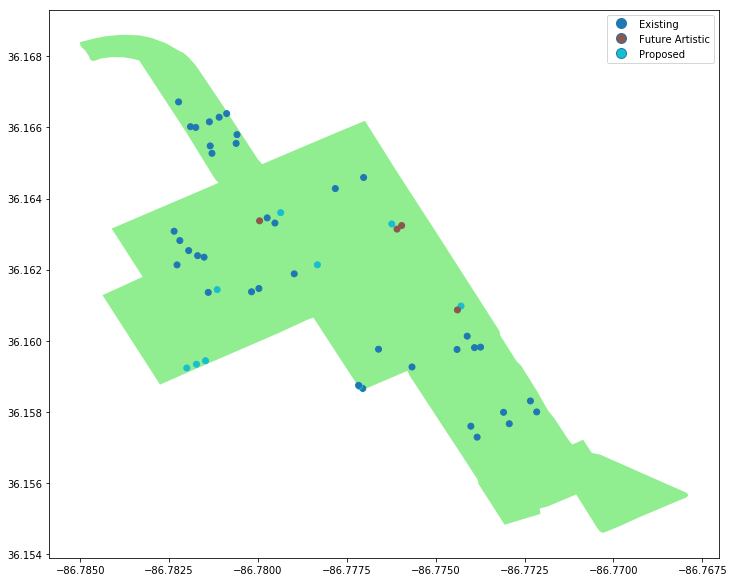

In [191]:
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
urban_bikes.plot( ax = ax, column = 'Status', legend = True);
plt.show();

In [192]:
edgehill_bikes = nash_bike_racks.loc[nash_bike_racks.name == 'Edgehill (ONE)']
edgehill_bikes.head()

,the_geom,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,name
123,POINT (-86.78548004530001 36.1430665049),124,Rack,Public,Proposed,317,0,Elementary School,0,-86.785480,36.143067,Carter-Lawrence Elementary School,Health Dept,POINT (-86.78548004530001 36.1430665049),224,Edgehill (ONE)
124,POINT (-86.78360797479999 36.1419873599),125,Rack,Public,Existing,165,1,Park/Community Center,5,-86.783608,36.141987,"Rose Park, Easley Community Center",Health Dept,POINT (-86.78360797479999 36.1419873599),224,Edgehill (ONE)
125,POINT (-86.79044034729999 36.1373417767),126,Rack,Public,Proposed,318,0,School,0,-86.790440,36.137342,Murrell School,Health Dept,POINT (-86.79044034729999 36.1373417767),224,Edgehill (ONE)
126,POINT (-86.781125 36.1426527779),127,Rack,Public,Proposed,319,0,School,0,-86.781125,36.142653,Rose Park Magnet School,Health Dept,POINT (-86.781125 36.1426527779),224,Edgehill (ONE)
253,POINT (-86.78108837629999 36.137352618),254,Rack,Public,Proposed,376,0,Park,0,-86.781088,36.137353,Reservoir Park,Health Dept,POINT (-86.78108837629999 36.137352618),224,Edgehill (ONE)


In [193]:
edgehill_polygon = neighborhoods.loc[neighborhoods.name == 'Edgehill (ONE)']
edgehill_polygon.head()

,name,geometry
224,Edgehill (ONE),(POLYGON ((-86.78951657504554 36.1510446503927...


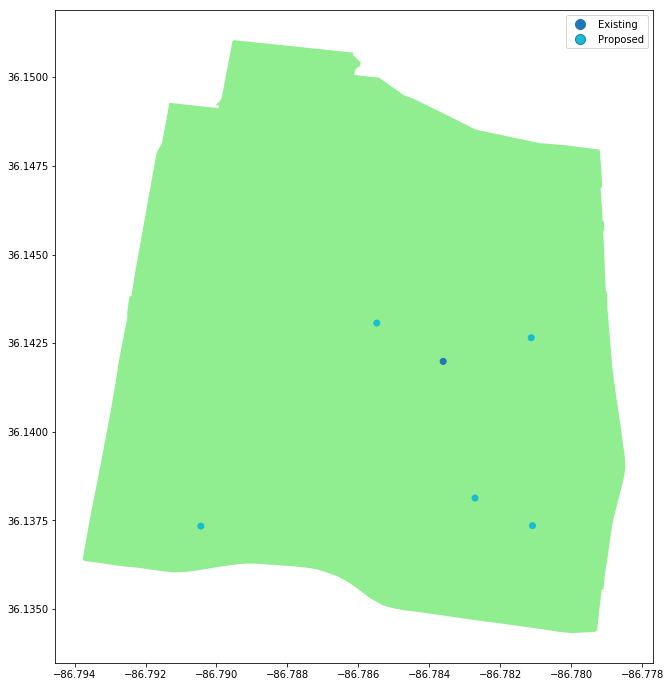

In [194]:
ax = edgehill_polygon.plot(figsize = (12, 12), color = 'lightgreen')
edgehill_bikes.plot( ax = ax, column = 'Status', legend = True);
plt.show();

In [195]:
urban_polygon.geometry.centroid

41    POINT (-86.77756457127047 36.16127820928791)
dtype: object

In [196]:
urban_center = urban_polygon.geometry.centroid
urban_center_point = urban_center.iloc[0]

In [197]:
print(urban_center_point)

POINT (-86.77756457127047 36.16127820928791)


In [198]:
# reverse the order for folium to work
urban_center_folium = [urban_center_point.y, urban_center_point.x]
print(urban_center_folium)

[36.161278209287914, -86.77756457127047]


In [199]:
downtown_map = folium.Map(location =  urban_center_folium, zoom_start = 15)
downtown_map

In [200]:
for row in urban_bikes.iterrows():
    row_values = row[1]
    print(row_values)

the_geom                    POINT (-86.7799546267 36.1633719897)
OBJECTID                                                      10
Type                                                        Rack
Domain                                                    Public
Status                                           Future Artistic
IDNumber                                                      83
Quantity                                                       0
Location                                                Bus Stop
Capacity                                                       0
LON                                                       -86.78
LAT                                                      36.1634
Detail_Loc     Bus Stop; Church St at 5th Ave N, Fifth Third ...
Data_Colle                                           Health Dept
geometry                    POINT (-86.7799546267 36.1633719897)
index_right                                                   41
name                     

In [201]:
#draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon).add_to(downtown_map)

#iterate through our urban art to create locations and markers for each piece
#here lat is listed first!!
#also the apostrophe in the 4th row causes problems!

for row in urban_bikes.iterrows():
    row_values = row[1] 
    location = [row_values['LAT'], row_values['LON']]
    popup = (str(row_values['IDNumber']) + ': ' + 
             str(row_values['Status']) + '<br/>' +
             str(row_values['Detail_Loc'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup)
    
    marker.add_to(downtown_map)

#display our map
downtown_map